In [1]:
import  pandas as pd
from sklearn.metrics import  *
import os


data=pd.read_csv("C:\\ML\\loan prediction.csv")

In [2]:
data['Total Income']=data['ApplicantIncome']+data['CoapplicantIncome']

In [3]:
data1=data[['Total Income','LoanAmount']]

In [4]:
med1=int(data1['LoanAmount'].median())

In [5]:
data1['LoanAmount'].fillna(med1,inplace=True)


C:\Users\manpr\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [7]:
X=data1.values

In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loan Amount')

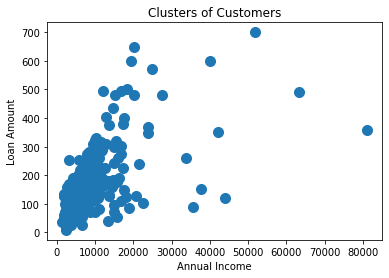

In [10]:
plt.scatter(data1['Total Income'],data1['LoanAmount'],s=100)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')

In [11]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X=sc.fit_transform(X)

In [13]:
from sklearn.cluster import KMeans

In [14]:
list1=[]

In [15]:
for i in range (1,11):
    kmeans= KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    list1.append(kmeans.inertia_)
    

Text(0, 0.5, 'Within Cluster Distance')

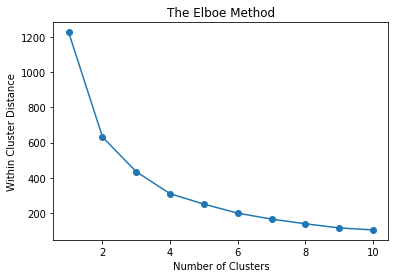

In [16]:
plt.plot(range(1,11),list1,marker='o')
plt.title('The Elboe Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Distance')

In [18]:
kmeans=KMeans(n_clusters=5,random_state=10)
y_means=kmeans.fit_predict(X)

In [20]:
data['kmeans']=y_means


In [21]:
data.replace({'kmeans':{0:'Red',1:'Blue',2:'Green',
                        3:'Orange',4:'purple'}},inplace=True)
data['kmeans'].value_counts()

Red       450
Green     139
purple     16
Orange      5
Blue        4
Name: kmeans, dtype: int64

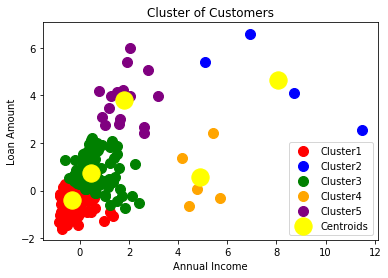

In [22]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=100,c='orange',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=100,c='purple',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend()